# Hexatonic Collections

## Included Collections

- HEX<sub>0,1</sub> (<strong>P</strong>itch <strong>C</strong>lasses C, E, or G#) in 1-3 ordering
- HEX<sub>1,2</sub> (<strong>PCs</strong> C#, F, A) in 1-3 ordering
- HEX<sub>2,3</sub> (PCs D, F# Bb) in 1-3 ordering
- HEX<sub>3,4</sub> (PCs Eb, G, B) in 1-3 ordering
- HEX<sub>0,1</sub> (PCs C#, F, A) in 3-1 ordering ("Augmented Scale")
- HEX<sub>1,2</sub> (PCs D, F#, Bb) in 3-1 ordering ("Augmented Scale")
- HEX<sub>2,3</sub> (PCs Eb, G, B) in 3-1 ordering ("Augmented Scale")
- HEX<sub>3,4</sub> (PCs E, Ab C) in 3-1 ordering ("Augmented Scale")

## Remaining Collections

- Prometheus Scale
- Blues Scale
- Tritone Scale

## Hexatonic Collections with their own Notebook

- Wholetone Scale

## Importing Necessary Libraries

In [1]:
import music21, copy
from IPython.display import Markdown, display

## Functions

### Printing to Markdown

In [2]:
# Printing to Markdown
# ------------------------

def print_md(string):
    """
    Pretty print function to print to markdown.
    """
    display(Markdown(string))


### Time Signature Fitting of Collection

In [3]:
# Finding a time signature based upon a pitch class collection's length
# ----------------------------------------------------------------------

def find_time_signature(scale):
    """
    Finds the best fitting time signature of a given scale in a music21 
    stream.
    """
    
    scale_stream = scale.flat.notes
    m = music21.stream.Measure()
    [m.insert(i.offset, i) for i in scale_stream]

    return music21.meter.bestTimeSignature(m)


### Analyzing a Hexatonic Collection from a music21 Stream

In [4]:
# Finding the mode and ordering of a hexatonic collection
# -------------------------------------------------------

def analyze_hexatonic_collection(collection):
    """
    Finding the hexatonic mode and ordering for chosen hexatonic collection 
    through analysis, meaning that a lookup table is not being used.
    If you were to use it in a project consulting a lookup table would 
    benefit computing time.
    """
    
    # convert the hexatonic collection into a note name sequence
    mode_notes = [n.name for n in collection]
    
    # converting notes in the hexatonic collection to pitch classes
    pitch_classes = [music21.pitch.Pitch(n).pitchClass for n in mode_notes]
    
    # interval between the first and second note 
    order = music21.interval.notesToChromatic(collection[0],collection[1])
    
    # the range of possible hexatonic collections
    the_range = 5
    
    if(order.directed == 1):
        
        # ordering of hexatonic collection with interval from first to second note
        ordering = "1-3"
        
        # checking for discrete pitch classes in hexatonic collection
        for x in range(the_range):
            if(all(n in pitch_classes for n in [x, x + 1])):
                hex_mode = x, x+1
                break
            
    else:
        
        # ordering of hexatonic collection with interval from first to second note
        ordering = "3-1"
        
        # checking for discrete pitch classes in hexatonic collection
        for x in range(the_range):
            if(all(n in pitch_classes for n in [x, x + 3])):
                hex_mode = (x + 3) % 4, ((x + 3) % 4) + 1
                break
            
    return hex_mode, mode_notes[0], pitch_classes[0], ordering  
    

### Creating a Hexatonic Collection Using music21's AbstractScale.buildNetworkFromPitches()

In [9]:
# Hexatonic Collections
# ----------------------------------------------------------------------
# Since there is no pre-cooked hexatonic collection à la Straus in
# music21, we have to create a new scale network to create a hexatonic
# collection. HEX3,4 (starting on pitch class C) in 3-1 ordering is also
# known as the "Augmented scale."

def get_hexatonic_collection(pc="C4", ordering="1-3"):
    """
    Builds a hexatonic collection based on a pitch center and either 1-3 
    or 3-1 ordering. The default pitch class for the pitch center in C4, 
    while the default ordering is 3-1.
    """
    
    # container for custom scale based on a pitch sequence model
    new_scale = music21.scale.AbstractScale()

    # deciding what ordering the new scale will have: 1-3 (default)
    # or 3-1
    if(ordering == '3-1'):
        new_scale.buildNetworkFromPitches(
            ["C#4", "E4", "F4", "G#4", "A4", "C5"])
    else:
        new_scale.buildNetworkFromPitches(
            ["C4", "C#4", "E4", "F4", "G#4", "A4"])

    # creating a hexatonic collection based on a given pitch center
    hex_col = new_scale._net.realizePitch(pc)

    # opening a stream to hold a hexatonic collection
    hexatonic_collection = music21.stream.Stream()

    # filling the stream with pitch class
    [hexatonic_collection.append(music21.note.Note(p)) for p in hex_col]

    # pitch centet
    pitch_center = music21.note.Note(pc).name 
    
    # return the collection
    return hexatonic_collection, pitch_center, ordering


## Example Creating a Hexatonic Collection

### F# Hexatonic Collection in 3-1 Ordering

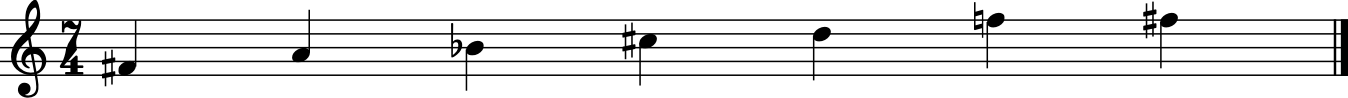

In [10]:
# Creating a hexatonic collection, providing the pitch center, and ordering
hexatonic_collection_1 = get_hexatonic_collection('f#4', '3-1')

# Creating a (backup) copy of the music21 stream
hexatonic_collection_2 = copy.deepcopy(hexatonic_collection_1[0])

# Finding a time signature that can hold the collection
hexatonic_collection_1[0].insert(0, find_time_signature(hexatonic_collection_1[0]))

# Print a header
print_md("### " + hexatonic_collection_1[1] + " Hexatonic Collection in " + 
         hexatonic_collection_1[2] + " Ordering")

# Printing the collection in Common Music Notation (CMN) format
hexatonic_collection_1[0].show()

## Example Analyzing a Hexatonic Collection

In [11]:
# analyzing mode, pitch center, and ordering of a given hexatonic collection
analysis_results = analyze_hexatonic_collection(hexatonic_collection_2)
analysis_results

((1, 2), 'F#', 6, '3-1')

### Formatting Analysis Results

In [12]:
# pretty printing results
print_md("<pre>Mode: \t\tHEX<sub>{},".format(analysis_results[0][0]) + 
         "{}</sub><br />".format(analysis_results[0][1]) + 
         "Pitch Center: {} ".format(analysis_results[1]) + 
         "({})<br />".format(analysis_results[2]) +
         "Ordering: \t{}".format(analysis_results[3]) + "</pre>")


<pre>Mode: 		HEX<sub>1,2</sub><br />Pitch Center: F# (6)<br />Ordering: 	3-1</pre>